# CONVOLUTIONAL NEURAL NETWORK

### 1 . Sequential Model

In [1]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


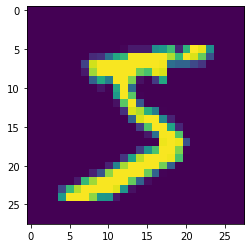

In [2]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [3]:
#check image shape
X_train[0].shape

(28, 28)

In [4]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [8]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))

In [9]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.1515 - accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0231 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0083 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0067 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0057 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

## 2 Hyper-Parameter Tunning

In [16]:
import keras_tuner
from tensorflow import keras
import numpy as np
import tensorflow as tf

In [21]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model
        

In [22]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [24]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist")

In [26]:
tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9878333210945129

Best val_accuracy So Far: 0.9893333315849304
Total elapsed time: 00h 03m 29s


In [27]:
model=tuner_search.get_best_models(num_models=1)[0]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 96)                2457696   
                                                                 
 dense_1 (Dense)             (None, 10)                970       
                                                                 
Total params: 2,510,762
Trainable params: 2,510,762
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0475 - val_accuracy: 0.9895
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0430 - val_accuracy: 0.9910
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0578 - val_accuracy: 0.9902
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0544 - val_accuracy: 0.9897
Epoch 8/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0631 - val_accuracy: 0.9893
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0505 - val_accuracy: 0.9927
Epoch 10/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0652 - val_accuracy